## Scelta del dataset
E' stato scelto il dataset sui vini perchè più simpatico.


In [1]:
from sklearn.datasets import load_wine
df = load_wine( as_frame=True ).data
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Correlazione
È stato chiesto di trovare le top 3 coppie di feature, usando tre distinti metodi di correlazione:
- Pearson
- Spearman
- Kendall

### Correlator
È stata progettata a tale scopo la classe `Correlator`, che si occupa di creare le combinazioni di coppie, e fornire il contesto per eseguire una funzione di correlazione tramite il metodo `run`, che prende come input una funzione `CorrelatorFn`, la quale implementa il metodo di correlazione.

In [2]:
from src.correlator import Correlator, pearson_fn, spearman_fn, kendall_fn
correlator = Correlator(df)

Esimendosi da complicate spiegazioni sui metodi di correlazione, di seguito si raccolgono e mostrano le prime tre coppie di features con correlazione più alta per ogni metodo:

In [3]:
from src.utils import correlation_score_table, top_dict_pairs
pearson_top3 = top_dict_pairs(correlator.run(pearson_fn), count = 3)
spearman_top3 = top_dict_pairs(correlator.run(spearman_fn), count = 3)
kendall_top3 = top_dict_pairs(correlator.run(kendall_fn), count = 3)
correlation_score_table(Pearson=pearson_top3, Spearman=spearman_top3, Kendall=kendall_top3)

,Correlation name,Features,Correlation
0,Pearson,"(total_phenols, flavanoids)",0.864564
1,Pearson,"(flavanoids, od280/od315_of_diluted_wines)",0.787194
2,Pearson,"(total_phenols, od280/od315_of_diluted_wines)",0.699949
3,Spearman,"(total_phenols, flavanoids)",0.864564
4,Spearman,"(flavanoids, od280/od315_of_diluted_wines)",0.787194
5,Spearman,"(total_phenols, od280/od315_of_diluted_wines)",0.699949
6,Kendall,"(total_phenols, flavanoids)",0.864564
7,Kendall,"(flavanoids, od280/od315_of_diluted_wines)",0.787194
8,Kendall,"(total_phenols, od280/od315_of_diluted_wines)",0.699949


### Grafici dei risultati
Di seguito i grafici delle top 3 feature per tecnica di correlazione:


#### Pearson

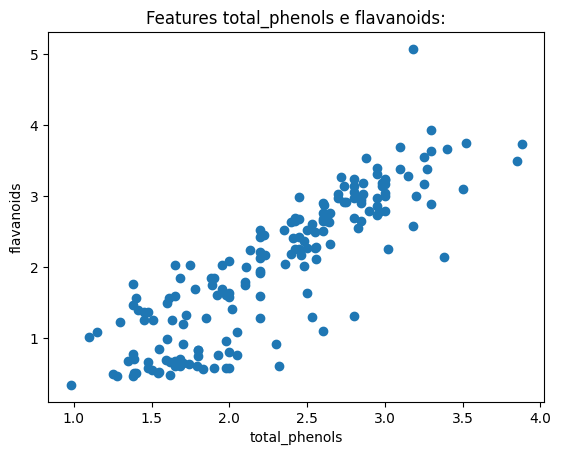

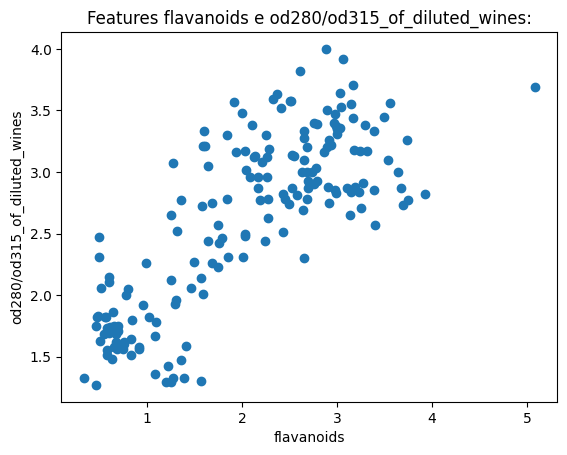

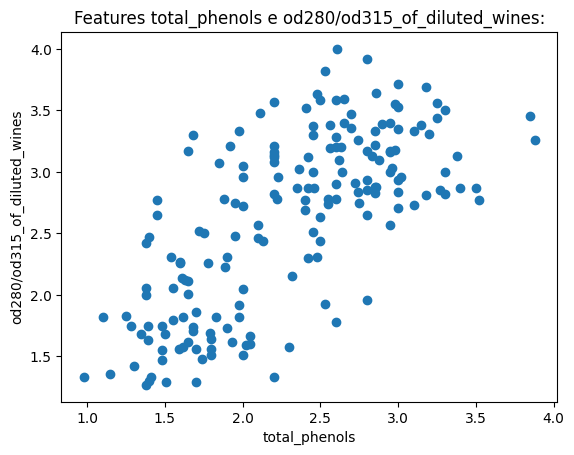

#### Spearman

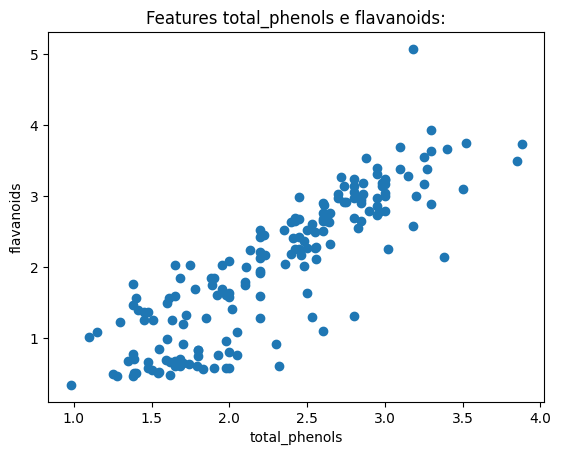

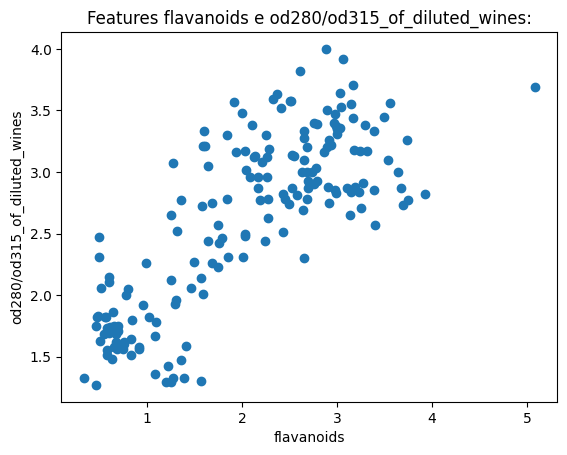

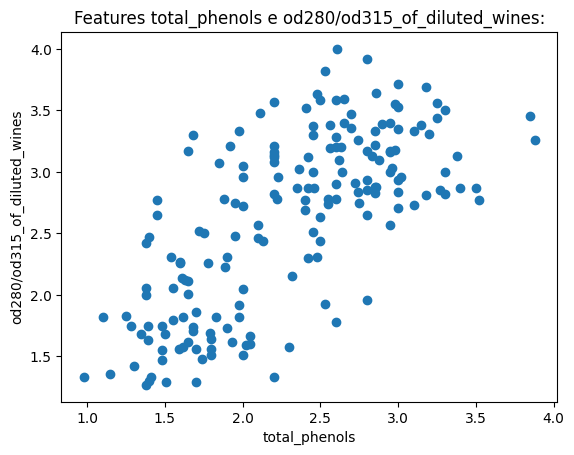

#### Kendall

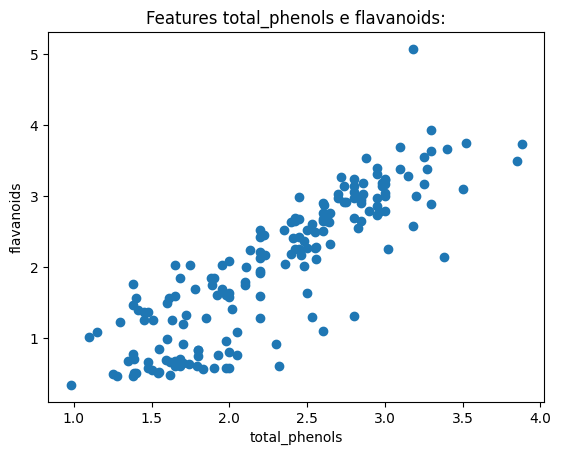

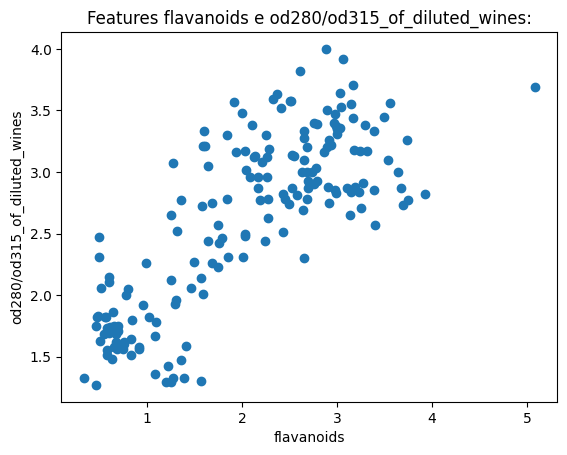

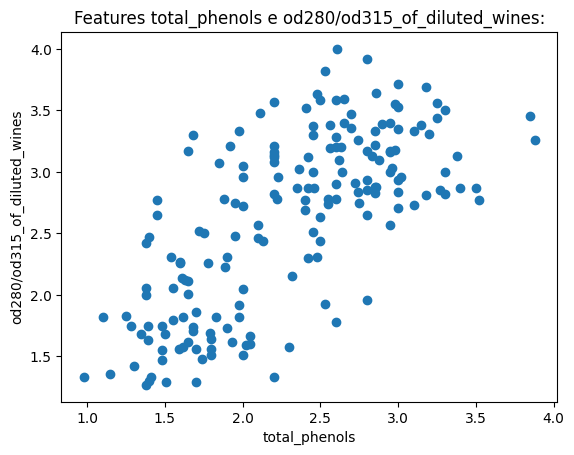

In [4]:
from src.utils import plot_correlations
plot_correlations(df, Pearson=pearson_top3, Spearman=spearman_top3, Kendall=kendall_top3)